In [1]:
import numpy as np
import pandas as pd

In [2]:
# 데이터를 로드
dataset = pd.read_csv("input.csv", sep=",")
dataset

,x1,x2,x3
0,3,2,0
1,1,2,0
2,5,6,1
3,6,7,1
4,5,5,1
5,4,5,0
6,3,6,0
7,8,0,0
8,9,6,1
9,6,2,0


In [3]:
# 설명(입력)변수 pandas -> numpy
X = dataset.loc[:, ['x1', 'x2']].values
X

array([[3, 2],
       [1, 2],
       [5, 6],
       [6, 7],
       [5, 5],
       [4, 5],
       [3, 6],
       [8, 0],
       [9, 6],
       [6, 2],
       [7, 8]])

In [4]:
# 목적(정답)변수
y = dataset['x3'].values
y

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1])

In [5]:
from sklearn.linear_model import LogisticRegression
# model 생성(준비)
model = LogisticRegression(random_state=42)

In [6]:
# 학습
model.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [7]:
import joblib
joblib.dump(model, "train.learn")

['train.learn']

In [8]:
# 배포

In [9]:
model2 = joblib.load("train.learn")

In [10]:
# model의 정확도
a = model2.coef_
b = model2.intercept_
print("회귀 계수:", a)
print("절편:", b)

회귀 계수: [[0.7983499  0.94553706]]
절편: [-8.71957507]


In [11]:
print("결정계수:", model2.score(X, y))

결정계수: 0.9090909090909091


In [12]:
test_data = pd.read_csv("test.csv", sep=",")
test_data

,x1,x2,x3
0,4,2,0
1,6,7,1
2,8,5,1
3,3,3,0


In [13]:
# 테스트용 데이터를 로드
X_test = test_data.loc[:, ['x1', 'x2']].values
y_pred = model2.predict(X_test)

print("결과:", y_pred)

결과: [0 1 1 0]


In [14]:
# 새로운 한개의 데이터로 결과를 출력
new_data = np.array([[6, 3]])
new_pred = model2.predict(new_data)
print("새로운 데이터의 결과:", new_pred)

새로운 데이터의 결과: [0]


#

### 붓꽃 품종(분류)

In [15]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris   # 붓꽃품종 데이터셋
from sklearn.model_selection import train_test_split # 데이터셋을 자르기 위한 모듈 8:2
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀

In [16]:
# 데이터 로드
dataset = load_iris()
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [17]:
X = dataset.data # 설명(입력)변수
y = dataset.target # 목적(출력)변수

y_name = dataset.target_names # 품종의 이름

y_name, X, y

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [

In [18]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'   # 한글사용
plt.rcParams['axes.unicode_minus'] = False

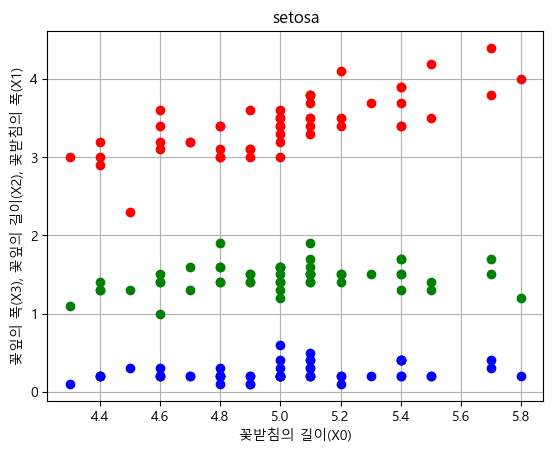

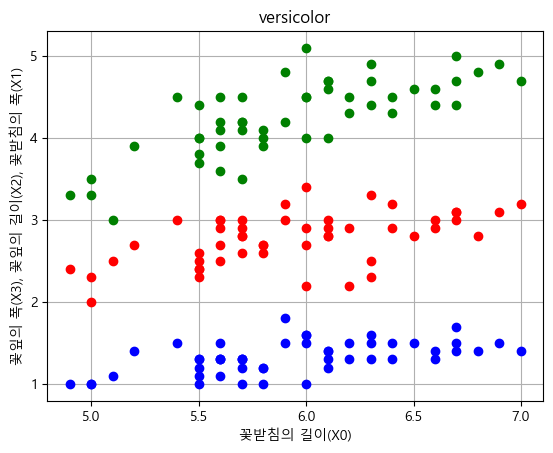

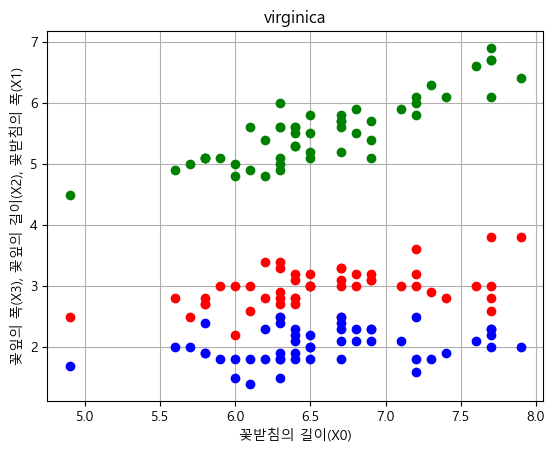

In [19]:
for i in range(y_name.shape[0]):
    # 각 품종에 대해서 50개의 데이터(0 ~ 49, 50 ~ 99, 100 ~ 149)
    #       x축:X[:,0]=꽃받침의 길이 y축:X[:,0]=꽃받침의 폭   
    plt.plot(X[i*50:i*50+50, 0], X[i*50:i*50+50, 1], 'o', color='red', label="X1")

    #       x축:X[:,0]=꽃받침의 길이 y축:X[:,2]=꽃잎의 길이
    plt.plot(X[i*50:i*50+50, 0], X[i*50:i*50+50, 2], 'o', color='green', label="X2")

    #       x축:X[:,0]=꽃받침의 길이 y축:X[:,3]=꽃잎의 폭
    plt.plot(X[i*50:i*50+50, 0], X[i*50:i*50+50, 3], 'o', color='blue', label="X3")

    plt.title(y_name[i])
    plt.xlabel("꽃받침의 길이(X0)")
    plt.ylabel("꽃잎의 폭(X3), 꽃잎의 길이(X2), 꽃받침의 폭(X1)")
    plt.grid(True)
    plt.show()

# Iris 데이터의 각 특성은 다음과 같죠:
# X0	        X1	         X2	         X3
#꽃받침 길이	   꽃받침 너비	꽃잎 길이	꽃잎 너비

In [20]:
# 학습용, 테스트용으로 분할(1:1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [21]:
# 모델을 준비
model = LogisticRegression(random_state=0)

In [22]:
# 학습
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [23]:
# 회귀 계수, 절편
a = model.coef_
b = model.intercept_
a, b

(array([[-0.44025005,  0.60957141, -1.95683288, -0.8253673 ],
        [ 0.27192808, -0.79144955, -0.03505644, -0.56069452],
        [ 0.16832197,  0.18187814,  1.99188933,  1.38606181]]),
 array([  8.57844936,   3.39861956, -11.97706892]))

In [24]:
# 예측 정확도 검증
print("훈련 데이터 입력 점수:", model.score(X_train, y_train))
print("테스트 입력 점수:", model.score(X_test, y_test))

훈련 데이터 입력 점수: 0.9733333333333334
테스트 입력 점수: 0.9333333333333333


In [25]:
# 새로운 데이터로 예측
new_data = np.array([[5.8, 3.0, 4.2, 1.2]])
#new_data = np.array([[5.1, 3.5, 1.4, 0.2]])

pred_label = model.predict(new_data)[0]   # 0, 1, 2
pred_name = y_name[pred_label]   # 꽃 이름으로 

pred_prob = model.predict_proba(new_data)[0]  # 각 클래스별 확률

print("클래스 번호:", pred_label)
print("꽃 이름:", pred_name)
print("클래스별 확률:", pred_prob)

#      0          1            2   -> 꽃의 이름에 맞는 번호 
# [0.03764576 0.86699148 0.09536276]

클래스 번호: 1
꽃 이름: versicolor
클래스별 확률: [0.03764576 0.86699148 0.09536276]


#

### 타이타닉

In [26]:
import numpy as np
import pandas as pd

dataset = pd.read_csv("titanic.csv")
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [28]:
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [29]:
# 전처리 작업 -> 누락된 데이터가 있음
dataset.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
# 제거 이유
# 컬럼	        이유
# PassengerId	단순 ID
# Name	        문자열, 직접적 예측 어려움
# Ticket	    범주 처리 필요
# Cabin	        결측값이 너무 많음
dataset.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [30]:
# 누락된 행을 표시(age)
dataset[dataset.isnull().any(axis=1)].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
29,0,3,male,NaN,0,0,7.8958,S
31,1,1,female,NaN,1,0,146.5208,C
32,1,3,female,NaN,0,0,7.7500,Q
36,1,3,male,NaN,0,0,7.2292,C
42,0,3,male,NaN,0,0,7.8958,C


In [31]:
# age열의 누락된 값을 평균값(통계에 영향을 주지않기 위해서)으로 설정
dataset['AgeEx'] = dataset['Age'].fillna(dataset['Age'].mean())

In [32]:
dataset[dataset.isnull().any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeEx
5,0,3,male,NaN,0,0,8.4583,Q,29.699118
17,1,2,male,NaN,0,0,13.0000,S,29.699118
19,1,3,female,NaN,0,0,7.2250,C,29.699118
26,0,3,male,NaN,0,0,7.2250,C,29.699118
28,1,3,female,NaN,0,0,7.8792,Q,29.699118
...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,29.699118
863,0,3,female,NaN,8,2,69.5500,S,29.699118
868,0,3,male,NaN,0,0,9.5000,S,29.699118
878,0,3,male,NaN,0,0,7.8958,S,29.699118


In [33]:
# 요약통계
dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,AgeEx
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.699118
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,13.002015
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,29.699118
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,35.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000


In [35]:
# 설명변수
X_train = dataset.loc[:, ["Fare", ]].values
X_train

array([[  7.25  ],
       [ 71.2833],
       [  7.925 ],
       [ 53.1   ],
       [  8.05  ],
       [  8.4583],
       [ 51.8625],
       [ 21.075 ],
       [ 11.1333],
       [ 30.0708],
       [ 16.7   ],
       [ 26.55  ],
       [  8.05  ],
       [ 31.275 ],
       [  7.8542],
       [ 16.    ],
       [ 29.125 ],
       [ 13.    ],
       [ 18.    ],
       [  7.225 ],
       [ 26.    ],
       [ 13.    ],
       [  8.0292],
       [ 35.5   ],
       [ 21.075 ],
       [ 31.3875],
       [  7.225 ],
       [263.    ],
       [  7.8792],
       [  7.8958],
       [ 27.7208],
       [146.5208],
       [  7.75  ],
       [ 10.5   ],
       [ 82.1708],
       [ 52.    ],
       [  7.2292],
       [  8.05  ],
       [ 18.    ],
       [ 11.2417],
       [  9.475 ],
       [ 21.    ],
       [  7.8958],
       [ 41.5792],
       [  7.8792],
       [  8.05  ],
       [ 15.5   ],
       [  7.75  ],
       [ 21.6792],
       [ 17.8   ],
       [ 39.6875],
       [  7.8   ],
       [ 76.

In [38]:
# 목적변수
y_train = dataset['Survived'].values
y_train     # 생존여부 : 0 = 사망, 1 = 생존

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [39]:
# AI model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [40]:
# model 학습
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


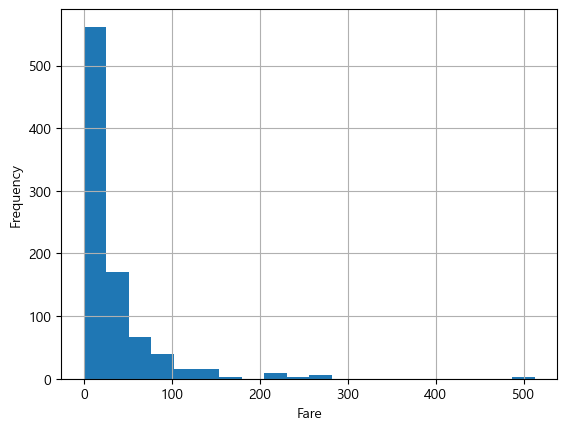

In [41]:
import matplotlib.pyplot as plt

plt.hist(X_train, bins=20)
plt.ylabel("Frequency")  # 빈도 수
plt.xlabel("Fare")
plt.grid()
#plt.show()

In [42]:
result = []  # 결과출력
for fare in range(0, 512, 1): # fare : 0 ~ 511      # 가로축
    result.append(model.predict([[fare]]))

result

[array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),

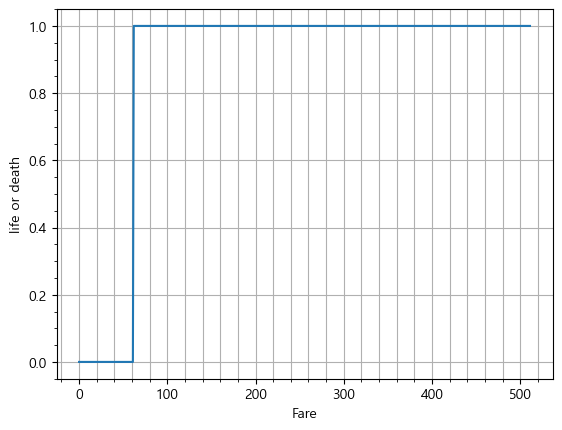

In [43]:
# 결과 그래픽
n = np.arange(0, 512, 1) # 0 ~ 511 = n

plt.plot(n, result)
plt.ylabel('life or death')  # y축: 생존여부(0 or 1)
plt.xlabel('Fare')           # x축: 운임
plt.minorticks_on()
plt.grid(which='both', axis='x')
plt.grid(axis="y")
plt.show()

In [46]:
from sklearn.model_selection import train_test_split

# 학습용, 테스트용 분리
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [47]:
# 정규화(0.0 ~ 1.0) <- 수치가 클 경우에는 필수!
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
# model 생성
model = LogisticRegression()

In [49]:
# model 학습
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [50]:
from sklearn.metrics import accuracy_score    # 정확도 -> 높을 수록 좋다

y_pred = model.predict(X_test)

print("Accuracy(정확도):", accuracy_score(y_test, y_pred))

Accuracy(정확도): 0.6503496503496503


#

#

In [54]:
# 정확도가 낮은편인 이유는 항목이 하나밖에 없어서이다
# 항목을 늘리면 정확도는 올라간다 

In [55]:
# Fare + AgeEx + SexNum 항목을 추가해서 logisticRegression <- model성능이 향상된다
# Sex -> Number   male:0, female: 1
dataset['SexNum'] = dataset['Sex'].map({ 'male': 0, 'female': 1 })
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeEx,SexNum
0,0,3,male,22.0,1,0,7.2500,S,22.0,0
1,1,1,female,38.0,1,0,71.2833,C,38.0,1
2,1,3,female,26.0,0,0,7.9250,S,26.0,1
3,1,1,female,35.0,1,0,53.1000,S,35.0,1
4,0,3,male,35.0,0,0,8.0500,S,35.0,0


In [57]:
# 입력데이터를 추가
X = dataset[['Fare', 'AgeEx', 'SexNum']].values
y = dataset['Survived'].values

# numpy 에서 배열의 갯수를 확인하고 싶은 경우
print(X.shape)
print(y.shape)

# 사용한 특성의 의미
# 특성	    설명
# Fare	    운임 (비쌀수록 생존 확률 ↑)
# AgeEx	    나이 (어릴수록 생존 확률 ↑)
# SexNum	성별 (여성 = 1 → 생존 확률 ↑)

(891, 3)
(891,)


In [58]:
X, y

(array([[ 7.25      , 22.        ,  0.        ],
        [71.2833    , 38.        ,  1.        ],
        [ 7.925     , 26.        ,  1.        ],
        ...,
        [23.45      , 29.69911765,  1.        ],
        [30.        , 26.        ,  0.        ],
        [ 7.75      , 32.        ,  0.        ]], shape=(891, 3)),
 array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
        1

In [59]:
from sklearn.model_selection import train_test_split

# 학습용, 테스트용 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [60]:
# 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
# model 생성
model = LogisticRegression()

# model 학습
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [62]:
from sklearn.metrics import accuracy_score    # 정확도 -> 높을 수록 좋다

y_pred = model.predict(X_test)

print("Accuracy(정확도):", accuracy_score(y_test, y_pred))

Accuracy(정확도): 0.776536312849162


#

In [64]:
# 새로운 데이터로 테스트
# Fare = 62, AgeEx = 30, female
human = np.array([[ 62, 30, 1 ]])
human_scaled = scaler.transform(human)

print("생존 예측:", model.predict(human_scaled))
print("생존 확률:", model.predict_proba(human_scaled))

생존 예측: [1]
생존 확률: [[0.22076578 0.77923422]]
